In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [77]:
df=pd.read_csv('Dataset/adult.csv',names=['Age','Work class','Final weight','Education','Education-num','Marital status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','Hours per week','Native country','Salary'])
df

,Age,Work class,Final weight,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours per week,Native country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [78]:
df.columns

Index(['Age', 'Work class', 'Final weight', 'Education', 'Education-num',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours per week', 'Native country',
       'Salary'],
      dtype='object')

<center>About data</center>
Age:Their age

Work class:indicates who they are working for

Final weight:indicates how many similar persons are there similar to the person in that row(estimated value using the values in that row)

Education:indicates their highest qualification

Education num:indicates how many years they spent in school

Marital status:indicates whether they are married or not..

Occupation:Their job

Relationship:indicates their family status

Race:inidicates different races

Sex:indicates gender

Capital gain:indicates the money made through any investment like stocks..

capital loss:indicates money lost through any investment like stocks..

Hours per week:indicates weekly working hours

Native country:indicates their orginal nationality

Target column

Salary:indicates whether salary>or =or< 50,000 or not



---

<center>removing unwanted columns</center>

In [79]:
#since the final weight is not going to impact the result removing that column
df.drop(['Final weight','Race','Relationship','Education-num'],axis=1,inplace=True)

<center>Removing duplicate columns</center>

In [80]:
#Removing duplicates
df=df.drop_duplicates()

<center>Removing null values</center>

In [81]:
df.isna().sum()
#zero Nan values in all the columns

Age               0
Work class        0
Education         0
Marital status    0
Occupation        0
Sex               0
Capital-gain      0
Capital-loss      0
Hours per week    0
Native country    0
Salary            0
dtype: int64

---

<center>Check for any unknown values other than data and fixing it</center>

In [82]:
df['Age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [83]:
df['Work class'].unique()
#in work class there is ? which is an unknown value so replacing it

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [84]:
df['Work class'].value_counts()

Work class
Private             18155
Self-emp-not-inc     2459
Local-gov            1994
?                    1548
State-gov            1251
Self-emp-inc         1091
Federal-gov           926
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [85]:
df['Work class']=np.where(df['Work class']==' ?',df['Work class'].mode()[0],df['Work class'])
#changing the ? with mode of work class

In [86]:
df['Education'].unique()
#there is no unknown data in education column

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [87]:
# df['Education-num'].unique()
#there is no unknown data in education column

In [88]:
df['Marital status'].unique()
#there is no unknown data in education column

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [89]:
df['Occupation'].unique()
#there exist an unknown data ? in the column so remove or replace it 

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [90]:
df['Occupation'].value_counts()

Occupation
Prof-specialty       3774
Exec-managerial      3613
Craft-repair         3099
Sales                3070
Adm-clerical         2993
Other-service        2736
Machine-op-inspct    1566
?                    1555
Transport-moving     1393
Handlers-cleaners    1071
Farming-fishing       951
Tech-support          849
Protective-serv       620
Priv-house-serv       146
Armed-Forces            9
Name: count, dtype: int64

In [91]:
df['Occupation']=df['Occupation'].replace(' ?',df['Occupation'].mode()[0])
#replaced the ? with the mode of the column

In [92]:
# df['Relationship'].unique()

In [93]:
# df['Race'].unique()

In [94]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [95]:
df['Salary'].unique()
#there is no unknown value in salary column

array([' <=50K', ' >50K'], dtype=object)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27445 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             27445 non-null  int64 
 1   Work class      27445 non-null  object
 2   Education       27445 non-null  object
 3   Marital status  27445 non-null  object
 4   Occupation      27445 non-null  object
 5   Sex             27445 non-null  object
 6   Capital-gain    27445 non-null  int64 
 7   Capital-loss    27445 non-null  int64 
 8   Hours per week  27445 non-null  int64 
 9   Native country  27445 non-null  object
 10  Salary          27445 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.5+ MB


In [97]:
df.describe()
#using the details from the info and describe its clear that there is no ? or unknown values in left columns

,Age,Capital-gain,Capital-loss,Hours per week
count,27445.000000,27445.000000,27445.000000,27445.000000
mean,39.801166,1269.858007,102.887848,40.805611
std,13.668097,8003.058325,435.635682,12.986836
min,17.000000,0.000000,0.000000,1.000000
25%,29.000000,0.000000,0.000000,38.000000
50%,38.000000,0.000000,0.000000,40.000000
75%,49.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


---

<center>Handling outliers if exists</center>

<Axes: ylabel='Age'>

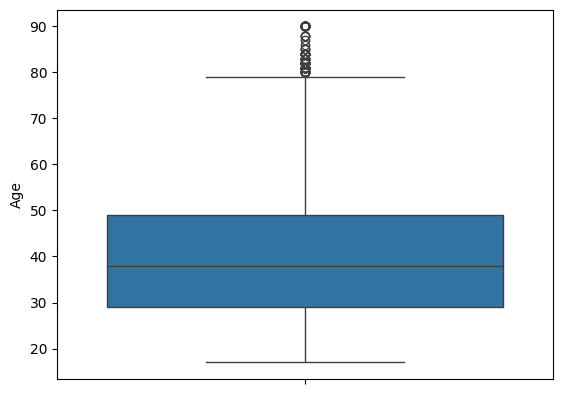

In [98]:
sns.boxplot(df['Age'])

from the boxplot it's clear that there exists outliers

calculating iqr

In [99]:
q1,q3=np.percentile(df['Age'],[25,75])
iqr=q3-q1
iqr

np.float64(20.0)

calculating upper limit and lower limit

In [100]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(np.float64(79.0), np.float64(-1.0))

since there is only outliers above the upper limit fixing outliers using caping

In [101]:
df['Age']=np.where(df['Age']>upper_limit,upper_limit,df['Age'])

In [102]:
# sns.boxplot(df['Education-num'])

In [103]:
# q1,q3=np.percentile(df['Education-num'],[25,75])
# iqr=q3-q1
# iqr

In [104]:
# upper_limit=q3+1.5*iqr
# lower_limit=q1-1.5*iqr
# upper_limit,lower_limit

In [105]:
# df['Education-num']=np.where(df['Education-num']<lower_limit,lower_limit,df['Education-num'])

<Axes: ylabel='Capital-gain'>

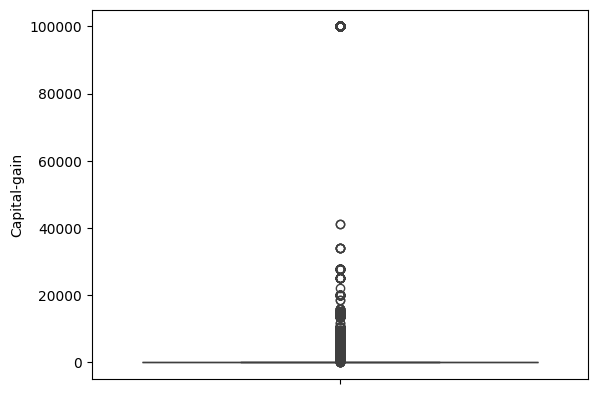

In [106]:
sns.boxplot(df['Capital-gain'])

<Axes: ylabel='Capital-loss'>

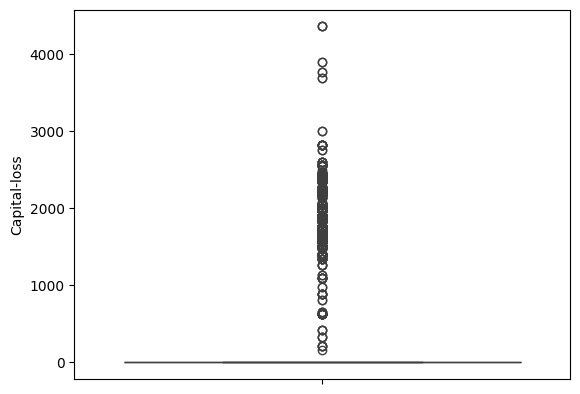

In [107]:
sns.boxplot(df['Capital-loss'])

<Axes: ylabel='Hours per week'>

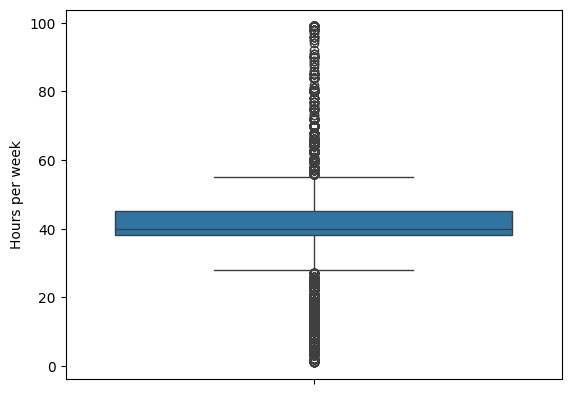

In [108]:
sns.boxplot(df['Hours per week'])

---

<center>Removing skewness</center>

In [109]:
numeric_column=df.select_dtypes(include=np.number)
skewness=numeric_column.skew().sort_values(ascending=False)
skewness
#here capital_gain and capital_lose is skewed 

Capital-gain      11.003415
Capital-loss       4.181215
Age                0.473731
Hours per week     0.225917
dtype: float64

In [110]:
#since both columns have zero fixing using square root transformation
df['Capital-gain']=df['Capital-gain']**0.5
df['Capital-loss']=df['Capital-loss']**0.5

---

<center>Encoding the data</center>

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27445 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             27445 non-null  float64
 1   Work class      27445 non-null  object 
 2   Education       27445 non-null  object 
 3   Marital status  27445 non-null  object 
 4   Occupation      27445 non-null  object 
 5   Sex             27445 non-null  object 
 6   Capital-gain    27445 non-null  float64
 7   Capital-loss    27445 non-null  float64
 8   Hours per week  27445 non-null  int64  
 9   Native country  27445 non-null  object 
 10  Salary          27445 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.5+ MB


In [112]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Work class']=le.fit_transform(df['Work class'])

In [113]:
df['Education']=le.fit_transform(df['Education'])

In [114]:
df['Marital status']=le.fit_transform(df['Marital status'])

In [115]:
df['Occupation']=le.fit_transform(df['Occupation'])

In [117]:
df=pd.get_dummies(df,columns=['Sex'],dtype=int)

In [118]:
df['Native country']=le.fit_transform(df['Native country'])

In [119]:
df['Salary']=le.fit_transform(df['Salary'])

In [120]:
df

,Age,Work class,Education,Marital status,Occupation,Capital-gain,Capital-loss,Hours per week,Native country,Salary,Sex_ Female,Sex_ Male
0,39.0,6,9,4,0,46.626173,0.0,40,39,0,0,1
1,50.0,5,9,2,3,0.000000,0.0,13,39,0,0,1
2,38.0,3,11,0,5,0.000000,0.0,40,39,0,0,1
3,53.0,3,1,2,5,0.000000,0.0,40,39,0,0,1
4,28.0,3,9,2,9,0.000000,0.0,40,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53.0,3,12,2,3,0.000000,0.0,40,39,1,0,1
32555,22.0,3,15,4,10,0.000000,0.0,40,39,0,0,1
32556,27.0,3,7,2,12,0.000000,0.0,38,39,0,1,0
32558,58.0,3,11,6,0,0.000000,0.0,40,39,0,1,0


---

<Axes: >

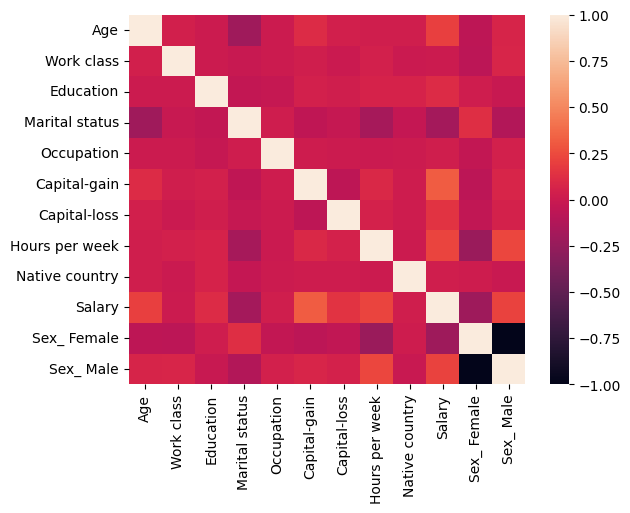

In [121]:
sns.heatmap(df.corr())

<center>Splitting</center>

In [122]:
x=df.drop(['Salary'],axis=1)
y=df['Salary']

---

<center>scaling</center>

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

---

<center>Splitting into training and test data</center>

In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=2)

<center>Logistic Regression</center>

In [126]:
#model creation
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [127]:
y_pred=lr.predict(x_test)


In [128]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      6043
           1       0.68      0.33      0.45      2191

    accuracy                           0.78      8234
   macro avg       0.74      0.64      0.66      8234
weighted avg       0.77      0.78      0.75      8234



<center>K neighbours classifier</center>

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(p=2,n_neighbors=7)
knn.fit(x_train,y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [130]:
y_pred=knn.predict(x_test)

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      6043
           1       0.67      0.58      0.62      2191

    accuracy                           0.81      8234
   macro avg       0.76      0.74      0.75      8234
weighted avg       0.81      0.81      0.81      8234



In [132]:
y.value_counts()

Salary
0    20300
1     7145
Name: count, dtype: int64

since the value counts indicate that the data is imbalanced

In [133]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
x,y=os.fit_resample(x,y)


In [134]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=2)

In [136]:
#model creation
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=1)
lr.fit(x_train,y_train)
y_lr_pred=lr.predict(x_test)
model={}
model['LogisticRegression']=y_lr_pred

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(p=2)
knn.fit(x_train,y_train)
y_knn_pred=knn.predict(x_test)
model['KNeighborsClassifier']=y_knn_pred

In [138]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_dt_pred=dt.predict(x_test)
model['DecisionTreeClassifier']=y_dt_pred

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=9,
    random_state=42,
    n_jobs=-1)
rf_classifier.fit(x_train,y_train)
y_rf_pred=rf_classifier.predict(x_test)
model['RandomForestClassifier']=y_rf_pred

In [140]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',C=1)
sv.fit(x_train,y_train)
y_sv_pred=sv.predict(x_test)
model['Support Vector Classifier']=y_sv_pred

In [141]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
gb=GaussianNB()
gb.fit(x_train,y_train)
y_nb_pred=gb.predict(x_test)
model['Nave bayes']=y_nb_pred

In [142]:
from sklearn.ensemble import AdaBoostClassifier
ac=AdaBoostClassifier(random_state=1)
ac.fit(x_train,y_train)
y_ab_pred=ac.predict(x_test)
model['Adaboost classifier']=y_ab_pred

In [143]:
from sklearn.metrics import classification_report
for y_pred in model:
    print(y_pred,'\n',classification_report(y_test,model[y_pred]))

LogisticRegression 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      6096
           1       0.75      0.75      0.75      6084

    accuracy                           0.75     12180
   macro avg       0.75      0.75      0.75     12180
weighted avg       0.75      0.75      0.75     12180

KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      6096
           1       0.82      0.89      0.85      6084

    accuracy                           0.84     12180
   macro avg       0.85      0.84      0.84     12180
weighted avg       0.85      0.84      0.84     12180

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      6096
           1       0.83      0.83      0.83      6084

    accuracy                           0.83     12180
   macro avg       0.83      0.83      0.83     12180
weigh

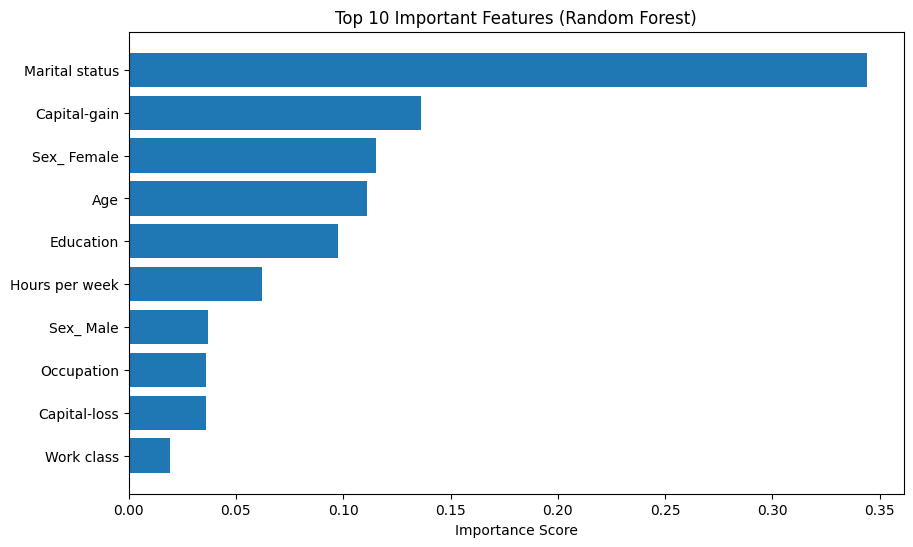

In [144]:
import matplotlib.pyplot as plt

importances = rf_classifier.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance Score')
plt.title('Top 10 Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

#the below graph indicates which feature is given the maximum score while creating the model in 
#random forest algorithm here it is maritial status
#it means ms is the most important feature which can seperate people income <or >50000
#best fit attribute

In [147]:
import joblib
joblib.dump(rf_classifier, 'model.pkl')
joblib.dump(le, 'encoders.pkl')

['encoders.pkl']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params={'n_estimators': [100, 200, 300, 500],'max_depth': [10, 20, 30],}
clf=RandomizedSearchCV(rf_classifier,params,cv=5,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)